In [1]:
import pandas as pd

In [3]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [4]:
test_data

,id,comment_text
0,6044863,==Orphaned non-free media (Image:41cD1jboEvL. ...
1,6102620,::Kentuckiana is colloquial. Even though the ...
2,14563293,"Hello fellow Wikipedians,\nI have just modifie..."
3,21086297,"AKC Suspensions \nThe Morning Call - Feb 24, 2..."
4,22982444,== [WIKI_LINK: Talk:Celts] ==
5,24388733,Hello Xdes! [WIKI_LINK: Wikipedia:Introduction...
6,26195914,"Hi there, I'm . I just wanted to let you know ..."
7,31769073,::I don't think a stuffed arm really counts as...
8,35289443,==Was it ever really a single in the UK?==
9,38393350,Thanks for uploading [WIKI_LINK: Image:Cloudco...


In [5]:
text = train_data['comment_text']

In [6]:
def clean_output_data(data, name):
    labels = pd.concat([data.toxic, data.severe_toxic, data.obscene, 
           data.threat, data.insult, data.identity_hate], axis=1)
    
    data = train_data[labels.sum(axis=1) > 0].reset_index(drop=True)
    
    
    data.to_csv('data/{}.csv'.format(name), index=False)

In [7]:
clean_output_data(test_data, 'preprocessed_test')

AttributeError: 'DataFrame' object has no attribute 'toxic'

In [8]:
train_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
labels = pd.concat([train_data.toxic, train_data.severe_toxic, train_data.obscene, 
           train_data.threat, train_data.insult, train_data.identity_hate], axis=1)

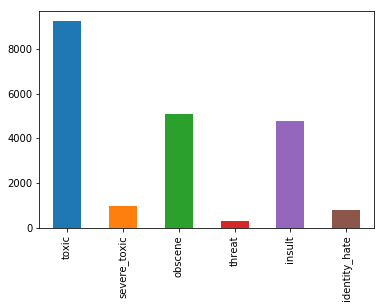

In [10]:
%matplotlib inline

labels.sum(axis=0).plot(kind='bar')

In [11]:
lengths = train_data.comment_text.str.split().str.len()

In [12]:
lengths.mean()

67.423605387528553

In [13]:
lengths.max()

1403

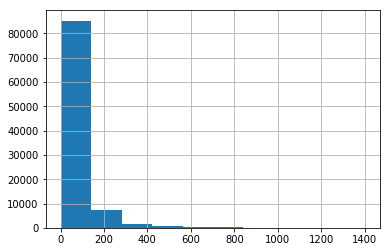

In [14]:
lengths.hist()

In [15]:
labels.sum(axis=0)

toxic            9237
severe_toxic      965
obscene          5109
threat            305
insult           4765
identity_hate     814
dtype: int64

In [16]:
train_data.toxic[train_data.toxic == 0].shape

(86614,)

In [17]:
import seaborn as sns

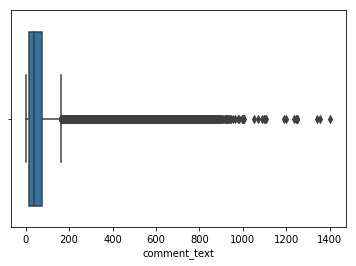

In [18]:
sns.boxplot(lengths)

In [19]:
labels.shape

(95851, 6)

In [20]:
toxic_labels = labels[labels.sum(axis=1) > 0].reset_index(drop=True)

In [21]:
train_data = train_data[labels.sum(axis=1) > 0].reset_index(drop=True)

In [22]:
train_data.shape

(9790, 8)

In [23]:
train_data.to_csv('data/preprocessed_train.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/preprocessed_train.csv'

In [24]:
toxic_labels.as_matrix()

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ..., 
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [25]:
import pickle as p

In [26]:
class_preds = p.load(open('class_preds.p', 'rb'))

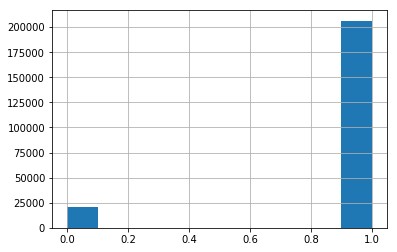

In [27]:
pd.Series(class_preds[0]).hist()

In [28]:
import numpy as np

In [29]:
x = np.array([0, 4, 0, 2, 3])

In [30]:
np.where(x )

(array([1, 3, 4]),)

In [31]:
x[np.array([0, 1])]

array([0, 4])

In [32]:
np.random.choice(x, 3, replace=False).tolist()

[2, 4, 0]

In [33]:

undersample_class = {
    'toxic': 1,
    'severe_toxic': 0,
    'obscene':1,
    'threat': 0,
    'insult': 0,
    'identity_hate': 0
}

TARGET_NAMES = ['toxic', 'severe_toxic', 'obscene', 'threat',
                        'insult', 'identity_hate']



In [34]:

l = 0
for i, name in enumerate(TARGET_NAMES):
    ux = np.where(train_data[name] == undersample_class[name])[0]
    
    mask = np.ones(train_data.shape[0], dtype=bool)
    mask[ux] = False
    nonundersampled_indices = np.arange(train_data.shape[0])[mask]
    print(nonundersampled_indices.shape)
    
    l += (nonundersampled_indices.shape[0] * 2)

(553,)
(965,)
(4681,)
(305,)
(4765,)
(814,)


In [38]:
import spacy

In [40]:
nlp = spacy.load('en')

In [49]:
tokens = nlp(train_data.comment_text[0:10])

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [48]:
for sentence in tokens.sents:
    print((sentence.text))

Nonsense?  
kiss off, geek.
what I said is true.  
I'll have your account terminated.
